In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LOADING THE DATA ⏳

In [3]:
dataset = pd.read_csv('boston.csv')
dataset.head(507)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

EXPLORATORY DATA ANALYSIS (EDA) 📈📊

In [6]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

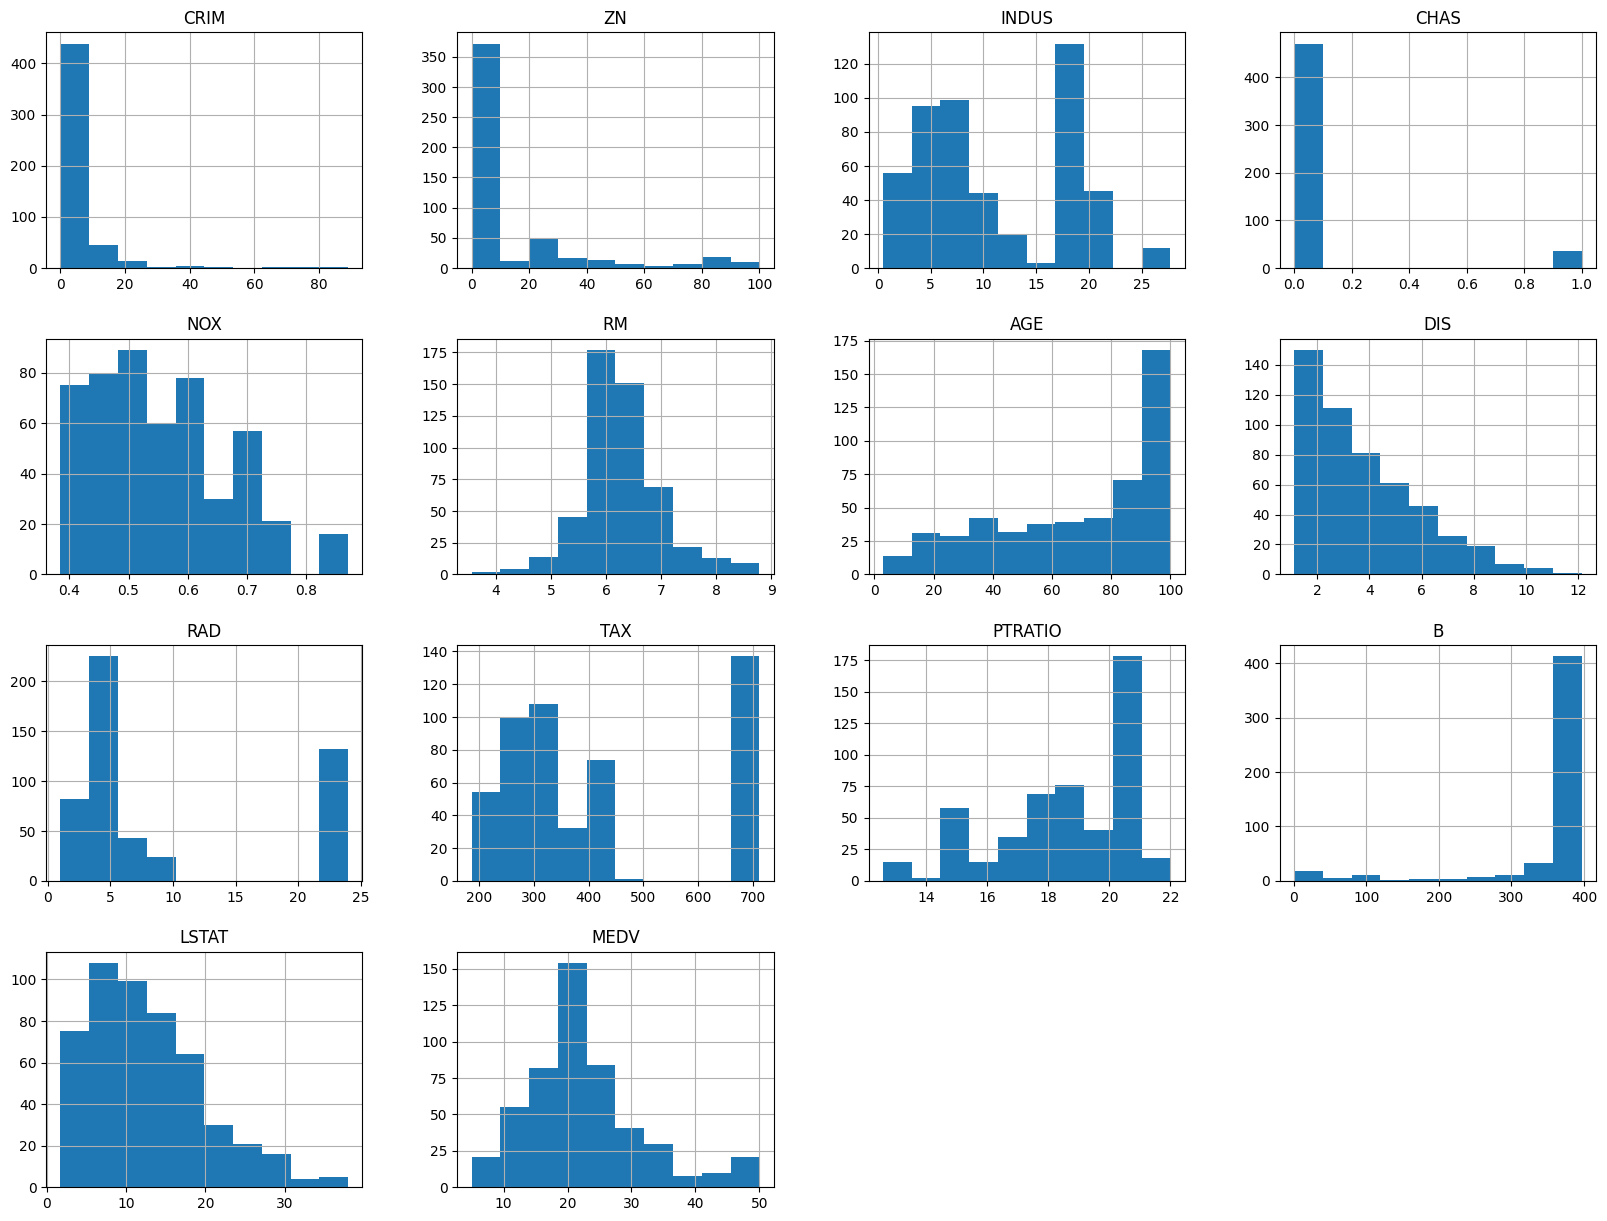

In [7]:
#now histogram
dataset.hist(figsize=(20,15))

Text(0, 0.5, 'Values')

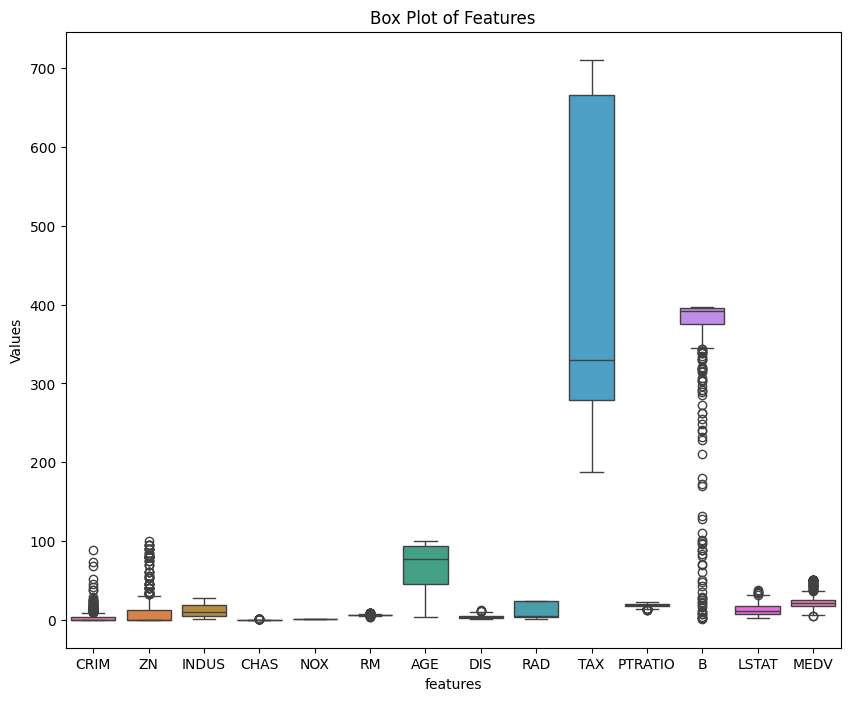

In [8]:
# box plots and remove outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset)
plt.title('Box Plot of Features')
plt.xlabel('features')
plt.ylabel('Values')

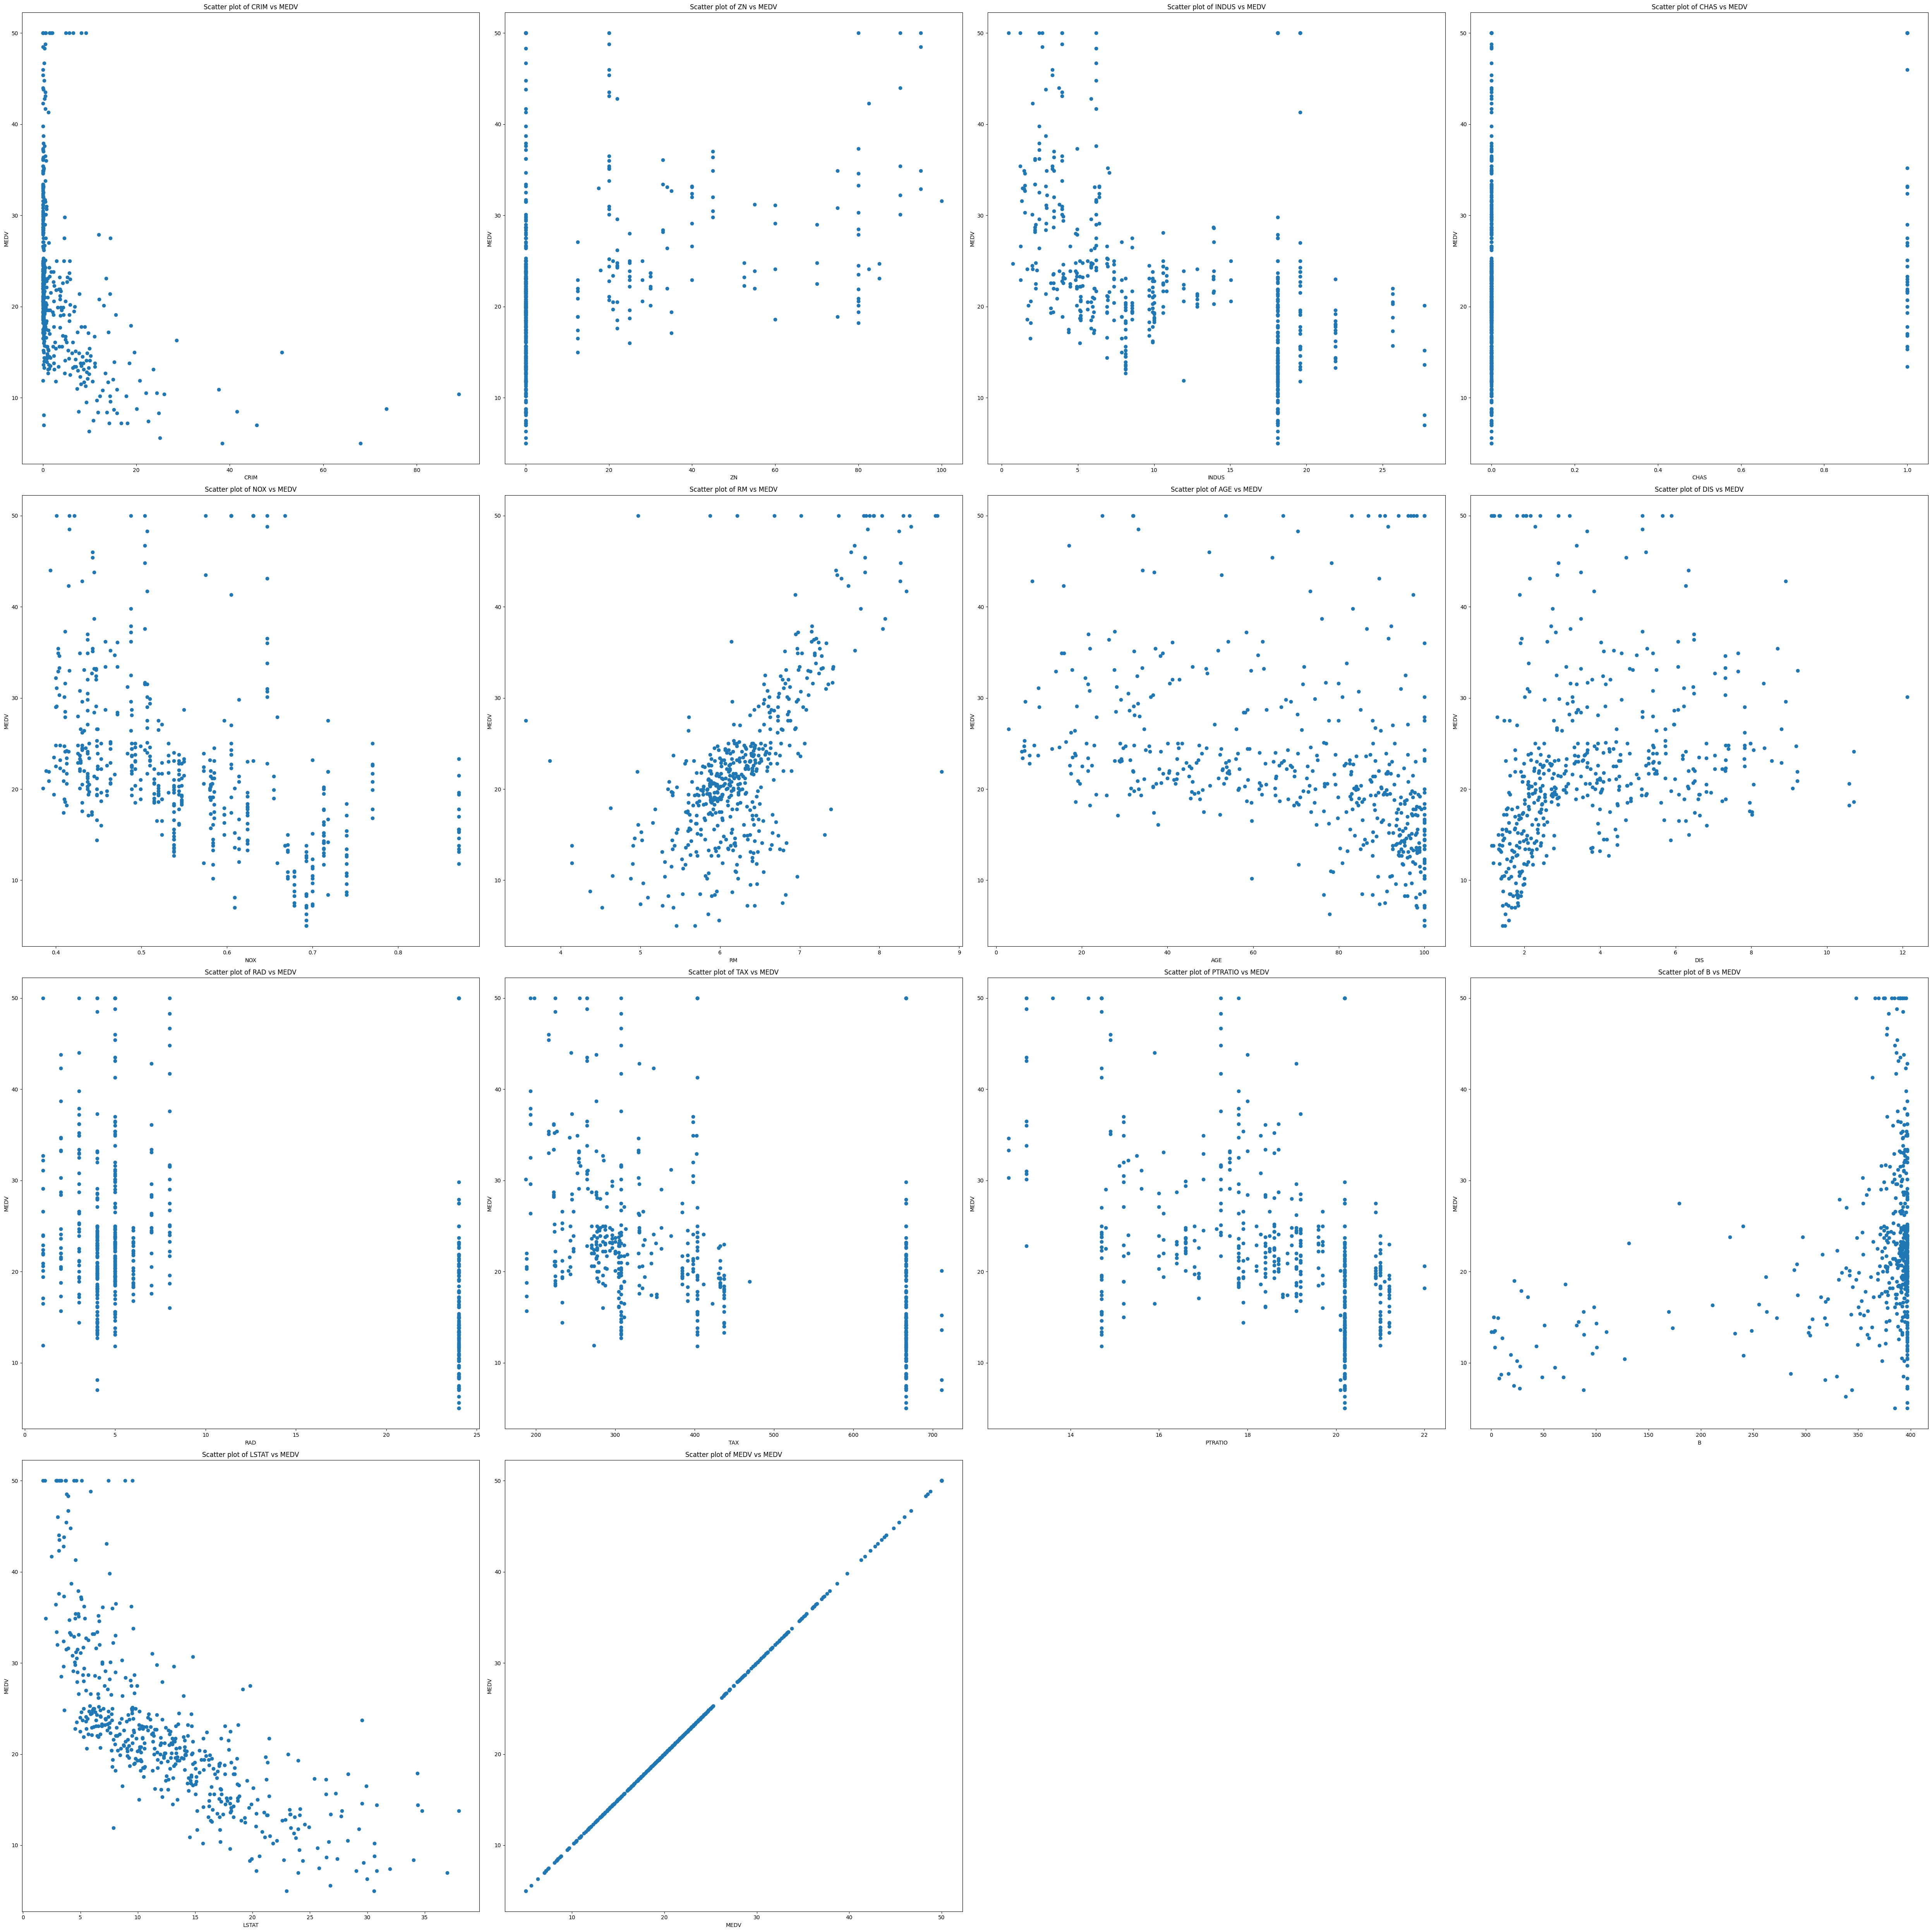

In [25]:
#now plotting scatter plots 
#target is MEDV
plt.figure(figsize=(50, 50))
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for i in range(len(features)):
    plt.subplot(4, 4, i + 1)
    plt.scatter(dataset[features[i]], dataset['MEDV'])
    plt.xlabel(features[i])
    plt.ylabel('MEDV')
    plt.title('Scatter plot of '+ features[i] +' vs MEDV')
plt.tight_layout()
plt.show()

In [10]:
# correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


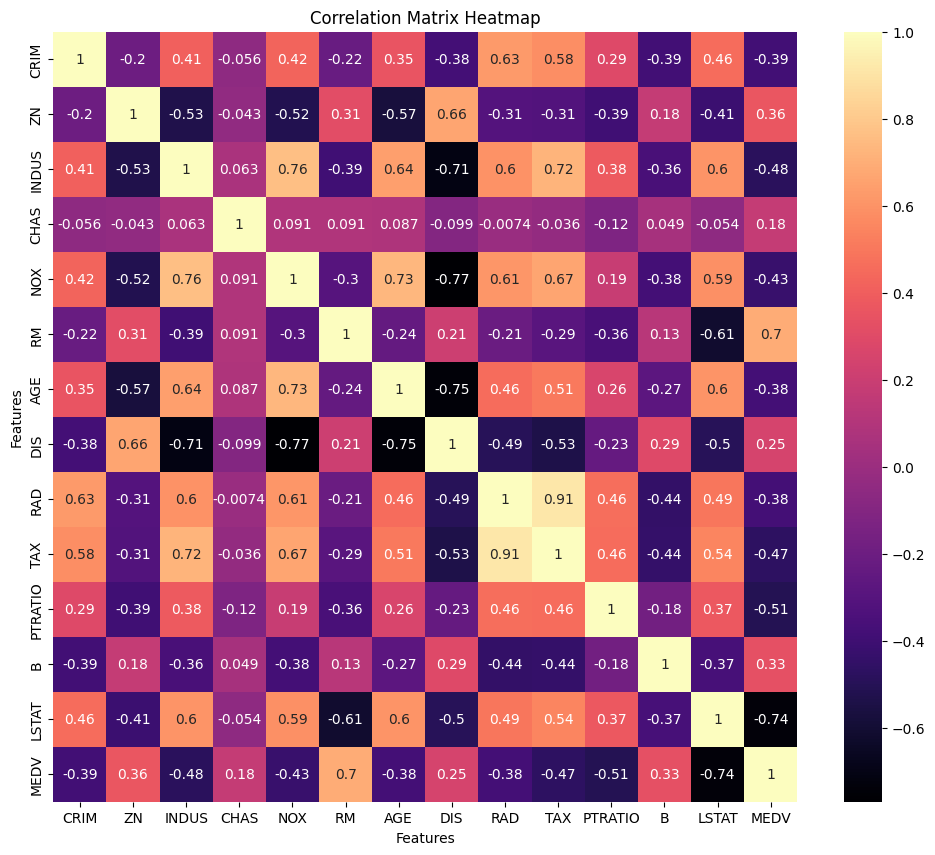

In [11]:
# now heatmapp for the above correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

TRAINING THE MODEL 🏋💪

In [12]:
X = dataset.drop('MEDV', axis=1)
Y = dataset['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [13]:
#training on dataset
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
#prediction on test data
Y_original = Y_test
print("Original Values: ", Y_original.values, 'ً\n')
Y_predicted = model.predict(X_test)
print("Predicted Values: ", Y_predicted, 'ً\n')

Original Values:  [22.  20.2 21.  19.3 13.2 22.6  6.3 17.4 33.2 18.6 22.5 19.8  8.7 31.5
 20.  23.6 29.1 14.1 19.7 32.4 20.4 19.3 17.6 26.4 28.7 34.9 20.8 31.1
 24.7 17.4 27.9 24.8  7.  20.   8.1 22.6 50.  15.4 22.2 22.3 20.  11.7
 22.5 22.2 50.  25.3 33.2 11.9 17.8 21.4 43.1 20.  13.  35.2 20.7 50.
 12.7 25.  13.8 35.4 31.7 19.5 22.9 24.  14.6 36.5 32.7 35.4 23.8 18.3
 33.  31.2 19.6 12.  21.2 15.  23.3 50.  22.9 22.  11.8 14.9 13.3 28.2
 19.  24.3 24.8 13.5 21.7 46.  31.6 11.9 22.5  7.5 15.6 16.6 23.2  7.2
 44.8 50.  17.  23.  16.8 13.1 15.  21.4 33.1 16.7 31.  16.7 26.6 21.4
 13.8 13.1 26.4 10.9 27.5 18.2 20.7 15.6  8.3 18.4 17.8 21.2 11.  25.
 17.1 24.3 21.7 20.1 30.7 15.4 24.4 29.8  8.5 19.9 34.7 16.1 24.4 11.7
 19.9 25.  10.4 30.5 50.  20.8 23.  39.8  8.8 13.1 23.1 23.8] ً

Predicted Values:  [25.87677463 16.33609949 22.83285587 22.04820859  9.60229474 22.93095248
 11.42824729 16.1298467  32.25718081 19.87761648 22.18881975 22.28977892
  9.74650087 31.02786261 20.63949055 30.2299

EVALUATION METRICSS 🗿

In [15]:
#calculating accuracy
mse = mean_squared_error(Y_original, Y_predicted)
print("Mean Squared Error: ", mse, 'ً\n')
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse, 'ً\n')
r2_accuracy_score = model.score(X_test, Y_test)
print("R2 Score: ", r2_accuracy_score * 100)

Mean Squared Error:  25.785588848733095 ً

Root Mean Squared Error:  5.0779512452103255 ً

R2 Score:  71.70818546272285


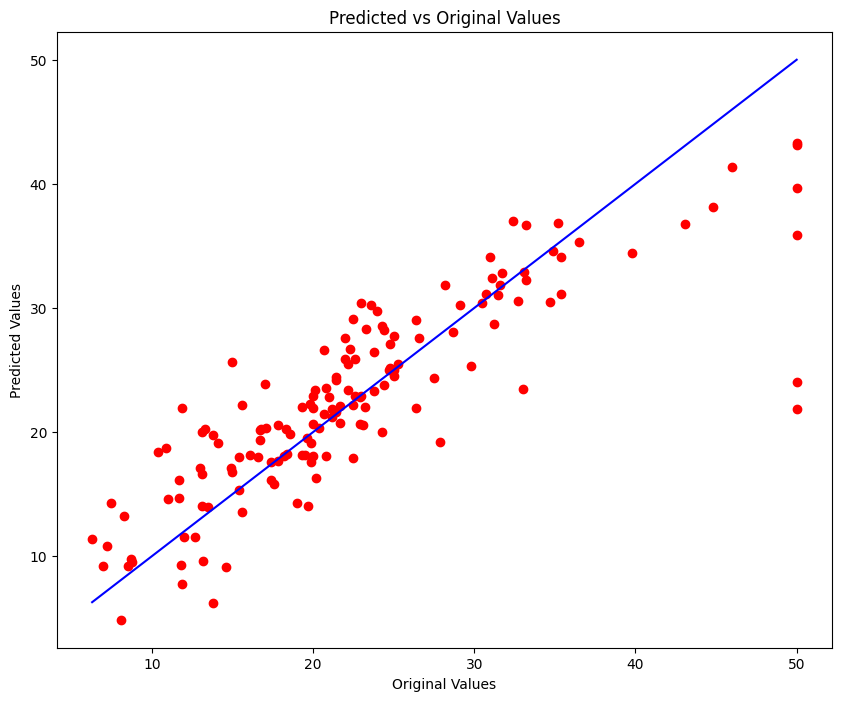

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_original, Y_predicted, color = 'red')
plt.plot([Y_original.min(), Y_original.max()], [Y_original.min(), Y_original.max()], '-', color = 'blue')
plt.title('Predicted vs Original Values')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()